# E1: Análisis Exploratorio de Datos en Python con Pandas y NumPy

En esta prueba práctica, los estudiantes aplicarán sus conocimientos en Python y herramientas de análisis de datos dentro del entorno Jupyter Notebook. A partir de un dataset ficticio de pacientes, deberán demostrar su capacidad para:
- Configurar el entorno de trabajo en Anaconda y Jupyter Notebook.
- Utilizar Pandas y NumPy para la manipulación y exploración de datos.
- Aplicar operaciones estadísticas básicas para extraer información relevante.
- Generar visualizaciones de datos con Matplotlib.

Este ejercicio tiene como objetivo evaluar la habilidad del estudiante para trabajar con datos en Python, desde su carga y preprocesamiento hasta su análisis y visualización. Se espera que los participantes estructuren su código de manera clara y utilicen buenas prácticas de programación.


#### Configuración del Entorno:

- Verifica que las librerías necesarias (numpy y pandas) estén instaladas en tu entorno. Si no lo están, instálalas usando pip o conda.
- Importa las librerías necesarias (numpy, pandas, matplotlib.pyplot) y muestra sus versiones en el notebook.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

print (f"version de numpy: {np.__version__}")
print (f"version de pandas: {pd.__version__}")
print (f"version de matplotlib: {plt.matplotlib.__version__}")

version de numpy: 1.26.4
version de pandas: 2.2.2
version de matplotlib: 3.9.2


#### Carga y Exploración de Datos:

- Descarga y carga el archivo datos_pacientes.csv en un DataFrame de Pandas.
- Muestra las primeras 5 filas del dataset.
- Obtén información sobre los tipos de datos y verifica la existencia de valores nulos en el dataset.


In [19]:
df = pd.read_csv('datos_pacientes.csv')
df.head()

,ID,Edad,Género,Peso,Altura,Presión_Arterial
0,1,71,F,116.4,1.69,143
1,2,34,M,67.7,1.50,127
2,3,80,M,75.1,1.69,137
3,4,40,M,76.6,1.90,116
4,5,43,M,92.4,1.80,109


In [23]:
##verificar los valores nulos
print(df.isnull().sum())

ID                  0
Edad                0
Género              0
Peso                0
Altura              0
Presión_Arterial    0
dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Edad              1000 non-null   int64  
 2   Género            1000 non-null   object 
 3   Peso              1000 non-null   float64
 4   Altura            1000 non-null   float64
 5   Presión_Arterial  1000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


#### Análisis Estadístico con Pandas:

- Muestra un resumen estadístico de las variables numéricas.
- Calcula la edad promedio de los pacientes y el número de pacientes por género.
- Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.

In [27]:
df.describe()

,ID,Edad,Peso,Altura,Presión_Arterial
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,500.500000,54.195000,84.51870,1.757730,135.25200
std,288.819436,20.521747,20.12022,0.141855,25.85767
min,1.000000,20.000000,50.00000,1.500000,90.00000
25%,250.750000,36.000000,66.50000,1.640000,112.00000
50%,500.500000,54.000000,84.75000,1.760000,136.00000
75%,750.250000,72.000000,102.05000,1.880000,157.00000
max,1000.000000,89.000000,119.80000,2.000000,179.00000


In [31]:
edad_promedio = df['Edad'].mean()
print(f"La edad promedio es: {edad_promedio:.1f}")
      

La edad promedio es: 54.2


In [33]:
numero_pacientes_genero =df['Género'].value_counts()
print(f"Número de pacientes por género: {numero_pacientes_genero}")

Número de pacientes por género: Género
M    502
F    498
Name: count, dtype: int64


In [43]:
pacientes_presion_alta = df[df['Presión_Arterial'] >130]
numero_pacientes = pacientes_presion_alta.shape[0]
print(f"Pacientes con presion arterial superior a 130 mgh: {numero_pacientes}")

Pacientes con presion arterial superior a 130 mgh: 555


#### Manipulación de Datos con NumPy y Pandas:

- Crea una nueva columna llamada IMC (Índice de Masa Corporal, BMI) utilizando la fórmula: 

<img src=https://www.eufic.org/en/media/images/2.2._bmi_img_1_.png width="250">

- Agrega una columna categórica Estado_IMC que clasifique a los pacientes en:
    - Bajo peso (IMC < 18.5)
    - Normal (IMC entre 18.5 y 24.9)
    - Sobrepeso (IMC entre 25 y 29.9)
    - Obesidad (IMC >= 30)
- Muestra la cantidad de pacientes en cada categoría de Estado_IMC.


In [55]:
df['IMC'] = df['Peso']/(df['Altura']**2)


In [57]:
def calcular_edo (imc):
    if imc <18:
        return 'Bajo peso'
    elif 18.5 <= imc < 24.5:
        return 'Normal'
    elif 25 <= imc < 29.9:
        return 'Sobrepeso'
    else:
        return 'Obesidad'
        
df['Estado_IMC'] = df['IMC'].apply(calcular_edo)
#print(f"el tiempo de ejecucion :{time.time()})

In [61]:
conteo_imc = df['Estado_IMC'].value_counts()
print(f"La cantidad de pacientes es: {conteo_imc}")

La cantidad de pacientes es: Estado_IMC
Obesidad     429
Normal       235
Sobrepeso    219
Bajo peso    117
Name: count, dtype: int64


#### Visualización de Datos:

- Genera un gráfico de barras que muestre la cantidad de pacientes en cada categoría de Estado_IMC.
- Usa matplotlib para personalizar el gráfico con título, etiquetas y colores adecuados.


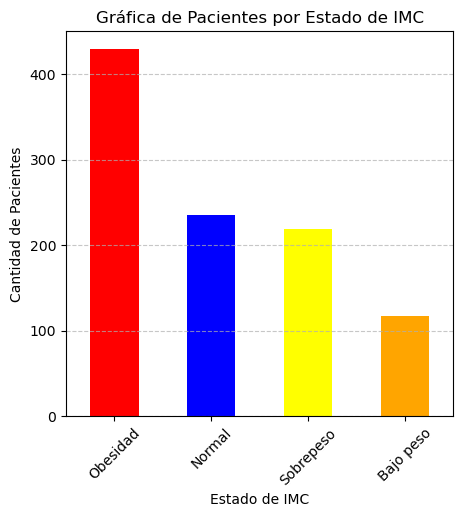

In [93]:
plt.figure(figsize=(5,5))
conteo_imc.plot (kind ="bar",  color = ["red", "blue", "yellow", "orange"])

plt.title('Gráfica de Pacientes por Estado de IMC')
plt.xlabel('Estado de IMC')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.grid(axis ="y" , linestyle = "--", alpha=0.7) 
         

plt.show()

In [102]:
#un metodo para imc diferente
#nunpy.select()


start =time.time start()
#definir las condiciones a clasificar
condiciones = [
    df["IMC"] <18.5,
    (df["IMC"] >=18.5) & ( df["IMC"] <=24),
    (df["IMC"] >=25) & ( df["IMC"] < 29),
    df["IMC"] >=30
]
#definir las categorias
categorias = ["Bajo peso", "Normal", "Sobrepeso", "Obesidad"]
df['Estado_IMC'] = np.select(condiciones, categorias,)
print (f"El tiempo de ejeuciión :{time.time-start}")
print(df['Estado_IMC'])

0       Obesidad
1       Obesidad
2      Sobrepeso
3         Normal
4      Sobrepeso
         ...    
995    Bajo peso
996     Obesidad
997     Obesidad
998     Obesidad
999            0
Name: Estado_IMC, Length: 1000, dtype: object
